In [51]:
import numpy as np
import pandas as pd
#from plotly.offline import iplot
#from plotly.graph_objs import *

#init_notebook_mode()
#import cufflinks as cf
#cf.go_offline()
import seaborn as sns
import matplotlib
#matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 8)
 

# Gestion Quantitative 




#### Prérequis mathématiques :
  * Calcul matriciel
  * La loi normale
  * Derivation de fonction
  * Regression linéaire

# Rappels mathématiques / modélisation des actifs

## Un peu de finance

* En gestion de portefeuille on parle souvent de la **net asset value (NAV)** qui est en fait la valorisation du fonds ou d'un portefeuille en argent (en euros par exemple). 

Pour la calculer c'est très facile:

* On prend la quantité $\delta$ d'un actif $i$ 

    **Exemple :** $\delta_i = 1000$ actions société générale

   * On en déduit le montant investi 
   
   $$M_i = \delta_i \mathrm{prix}_i$$
   
       **Exemple :** si le cours de de la SG est à 44 euros, $M_i = 1000 \times 44 = 44000\,\mathrm{euros}$

* La **NAV** ou valeur du portefeuille est simplement :

$$NAV = \sum_i  \delta_i \mathrm{prix}_i$$

* Généralement c'est plus facile de raisonner en poids $x$ de l'actif $i$ dans le portefeuille : 

   $$x_i = \frac{ \delta_i \mathrm{prix}_i}{NAV}$$
   
* On peut alors facilement passer des poids aux quantités :
   
   $$\delta_i = \frac{x_i NAV }{\mathrm{prix}_i}$$

In [52]:
##Calculer le poids de 1000 actions à 44 euros dans un portefeuille de 500000 euros
S = 44
NAV = 500000.0
delta = 1000
x_0 = delta*S/NAV
print "{0:.0f}%".format(x_0 * 100)

9%


**Si on regarde ce qu'il ce passe entre deux dates on a :**
* en t 

    $$ x_i(t)= \frac{ \delta_i(t) \mathrm{prix}_i(t)}{NAV(t)}$$
    
* en t+1

    $$ x_i(t+1)= \frac{ \delta_i(t) \mathrm{prix}_i(t+1)}{NAV(t+1)}$$
    
    car le prix de l'action SG a bougé mais on en a toujours 1000 dans le portefeuille. La quantité ne bouge pas. Par contre le poids a bougé.


In [53]:
# Le prix en t = 0 de SG est de 44 euros, et en t = 1 il est de 48 euros
p_0 = 44
p_1 = 48

#On démarre en t = 0 avec une valeur du pourtefeuille à 500000 euros
NAV_0 = 500000

SG = p_0*1000
cash = NAV_0-p_0*1000

#Quel est le poids en t = 1 ?
NAV_1 = p_1*1000.0 + cash
x_1 = delta*p_1/NAV_1
print "{0:.0f}%".format(x_1 * 100)

10%


* La NAV du fonds en $t+1$ devient donc :

$$NAV(t+1) =  \sum_i  \delta_i(t) \mathrm{prix}_i(t+1)$$ 


 * En remplaçant $\delta_i(t)$ on obtient : 
 
$$NAV(t+1) =  NAV(t)\sum_i  x_i(t) \frac{\mathrm{prix}_i(t+1)}{\mathrm{prix}_i(t)}$$ 

* Le rendement d'un actif est donné par :


$$ \mathrm{rendement}_\mathrm{i}  = \frac{\mathrm{prix}_i(t+1)}{\mathrm{prix}_i(t)}-1$$

* Si $\sum_ix_i = 1$ on obtient :


$$ \frac{NAV(t+1) }{NAV(t)} -1=   \sum_i x_i \mathrm{rendement}_\mathrm{i}  = \mathrm{rendement}_\mathrm{fonds}$$

On raisonne souvent en pourcent. La NAV ou la valeur du portefeuille en $t=0$ vaut 100% ou 1, les poids sont aussi exprimés en pourcentage.

In [54]:
# on a deux actifs, le poids de l'actif 1 vaut x_1 = 0.5 et le poids de l'actif 2 vaut aussi 0.5
x_1 = 0.5
x_2 = 0.5
 
#On démarre en t = 0 avec une valeur du pourtefeuille à 100%
V_0 = 1

# en t = 1 l'actif 1 a gagné 10% et l'actif 2 a perdu 5%. Quel est la valeur du portefeuille en %?

V_1 = V_0*(1+x_1*0.1 - x_2*0.05)

print "{0:.0f}%".format(V_1 * 100)

103%


# Modélisation des rendements

* La plupart du temps on modélise la dynamique des **rendements** des actifs (actions, futures, obligations...) à l'aide d'une loi normale. Si $S_t$ est le prix d'un actif, on rappelle que le rendement est :


$$r_t = \frac{S_t}{S_{t-1}}-1$$
et donc on a :

$$r_t\sim \mathcal{N}\left(\mu\mathrm{d}t,\sigma^2 \mathrm{d}t\right)$$

ou ** $\mu$  est le rendement moyen** de l'actif,  **$\sigma$ la volatilité moyenne** et **$\mathrm{d}t$ le pas de temps**. Ici tout est constant et exprimé en année.  


En calcul stochastique on a exactement la meme chose :

 \begin{eqnarray}
 \frac{dS_t}{S_t}  &=& \mu \mathrm{d}t+\sigma\mathrm{d}Wt  \\
   &=& \mu \mathrm{d}t+\sigma\sqrt{\mathrm{d}t}\epsilon_t  \\
 r_t&\sim& \mathcal{N}\left(\mu\mathrm{d}t,\sigma^2{\mathrm{d}t }\right)
\end{eqnarray}
 

ou $\epsilon_t \sim \mathcal{N}(0,1)$.
Dans la vraie vie les paramètres ne sont pas contants.

** On annualise très souvent les mesures de rendement et de volatilité**

In [55]:
#si on suppose qu'il a 260 jours de trading dans une année
mu_y = 0.05 #5%  par ans
vol_y = 0.1 #10%  par ans

mu_d = 0.05/260  #   par jour
vol_d = 0.1/260**0.5  #   par jour


On peut utiliser les estimateurs historiques. Par exemple :

  * $\hat{\mu} = \frac{1}{t_n-t_0}\sum_{i=0}^n \mathrm{rendement}(t_{i},t_{i+1})$
  
  * $\hat{\sigma}^2= \frac{1}{t_n-t_0}\sum_{i=0}^n \mathrm{rendement}(t_{i},t_{i+1})^2$

ici c'est l'estimateur de la variance est non-centré.

Souvent on utilise les estimateurs historiques en prenant **la moyenne et l'ecart type des rendements passées**, typiquement 1 ans. 

  * On sait (environ) calculer des volatilités et des corrélations

  * On sait mal calculer des tendances, des espérances de rendements

-> Recherche sur des méthodes pour connaitre les rendements espérés


**Il est important de comprendre que la volatilité est une mesure de risque très important quand on est sous hypothèse gaussienne**
<img src=https://upload.wikimedia.org/wikipedia/commons/a/a9/Empirical_Rule.PNG>


Il existe des moments d'ordres supérieur qui sont parfois utilisés lorsque l'hypothèse de rendement gaussien n'est plus vérifiée. En particulier la skewness qui mesure l'asymetrie d'une distribution.


<img src=https://www.tns-ilres.com/cms/App_Themes/Tns/www/images/WikiStats/asymetrie_aplatissement06.jpg  height="600" width="800">


# Stratégies de gestion simples

## Calcul d'un placement au taux sans risque

* Quand on place de l'argent sur un compte il évolue au taux sans risque en continue. 


* Si le taux est de 3% par année, sur une année de 365 jours un placement rapporte 3%/365 par jour.


* Pour les banques on prend souvent en référence le taux eonia (Euro OverNight Index Average).

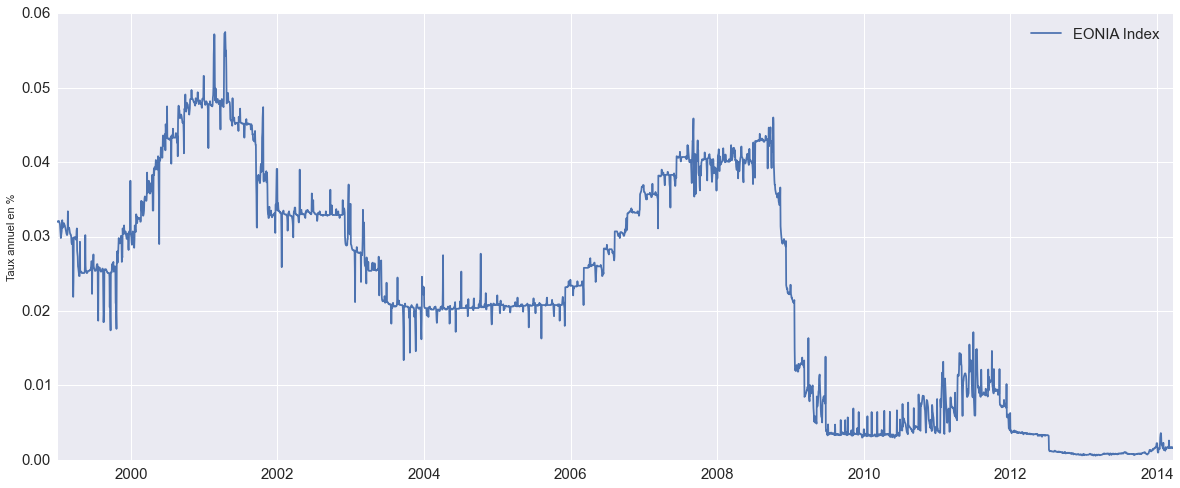

In [71]:
import matplotlib.pyplot as plt 
eonia = pd.read_csv("eonia.csv",sep=";",index_col=0, parse_dates=True,infer_datetime_format=True) 
eonia.plot( )
plt.ylabel('Taux annuel en %')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15)

* Le taux bouge tous les jours. 


* Pour connaitre la valeur d'un placement au taux sans risque 1 jour depuis 2000 il suffit de calculer chanque jour la valeur du placement.  

$$r_{t} =  \mathrm{eonia}_{t-1} \mathrm{d}t $$

avec $\mathrm{d}t= \frac{\mathrm{dates}_t-\mathrm{dates}_{t-1}}{365}$. 



Ensuite comme pour n'importe quelle autre actif / stratégie, quand on a les rendements, on compose pour obtenir la valeur de l'investissement :

\begin{eqnarray}
  \mathrm{valeur}_t &=&   \mathrm{valeur}_{t-1} + \mathrm{valeur}_{t-1}r_{t}  \\
 \mathrm{valeur}_t &= &  \mathrm{valeur}_{t-1} (1+r_{t}) 
\end{eqnarray}

**Exercice : capitaliser le taux Eonia**



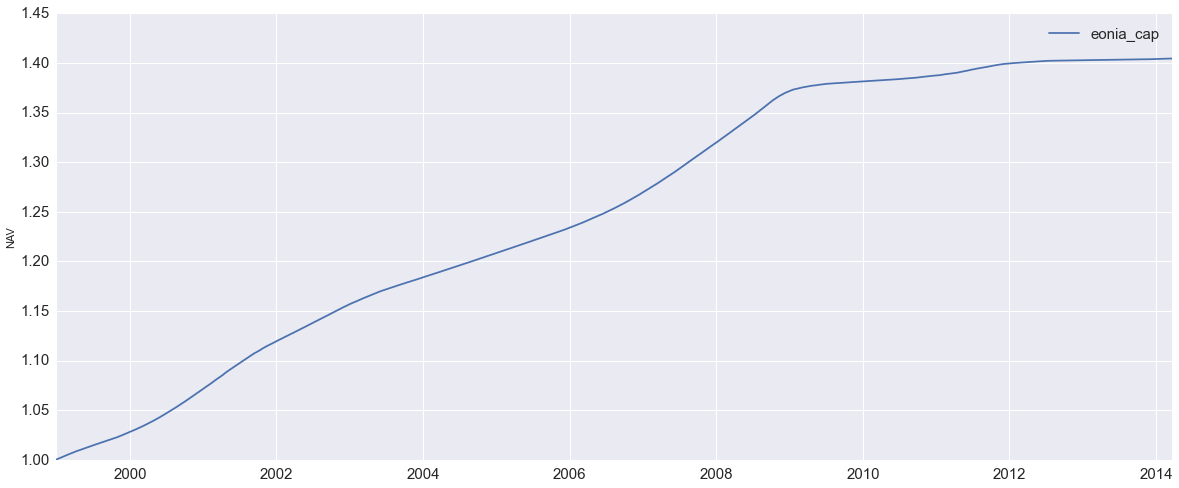

In [75]:
#calcul du pas de temps
dt = pd.DataFrame(eonia.index[1:].values-eonia.index[:-1].values,columns={"dt"})
#calcul du rendement de eonia, vaut 0 en date 0
r_eonia =  np.array(eonia['EONIA Index'])*( np.hstack((dt["dt"].shift(-1).dt.days/365,1/365)))
r_eonia = np.nan_to_num(r_eonia)
#cumul le taux
eonia_cap = pd.DataFrame((1+r_eonia).cumprod() ,columns={"eonia_cap"},index=eonia.index)
#eonia_cap.iplot(yTitle="NAV")
eonia_cap.plot( )
plt.ylabel('NAV')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15)

## Le portefeuille equally weighted

Dans la suite on notera :

* $n$ le nombre d'actifs dans le portefeuille


* $\Sigma$ la matrice de covariance 


* $\mu$ le vecteur des tendances des actifs


* $x$ le vecteur de poids des actifs.


* $V_t$ la valeur du portefeuille.

Le portefeuille le plus simple est le portefeuille "1/n":

$$x_i = \frac{1}{n}$$

 * On a le même poids dans chaque actif. On devra rebalancer le portefeuille pour les maintenir.



 
 
**Avantages**
 * C'est le portefeuille le plus diversifié en poids.  

 * Stratégie « take profit »: On vend les actifs dont le prix monte plus que les autres. On rachète ceux dont le prix baisse.
 * On vend à la hausse, on achète à la baisse -> on gagne grâce à la vol. 


**Inconvénients**
 * On se réexpose quand un actif baisse: théoriquement, un seul actif convergeant vers un prix nul entraine tout le portefeuille vers 0.
 * Pour des actifs très différents (actions vs bonds) le même poids ne fait pas de sens…

Pour juger de la qualité d'une stratégie, 4 mesures sont vraiment importantes :

  * Le rendement annualisé : $\mu = \left(\frac{V_T}{V_0}\right)^{1/n}-1$
  
  
  
  
  * La volatilité annualisé : $\sigma = \frac{1}{T-t_0}\sqrt{\left(\sum_{t=0}^T r_t -\bar{r}\right)^2}$
  
  
  
  
  * Le ratio de sharpe : $\theta =  \frac{\mu-r}{\sigma}$
  
  
  
  
  * Le maximum drawdown : $ \text{MDD}=\max_{\tau\in (0,T)}\left[\max_{t \in (0,\tau)} V_t- V_\tau \right]$

**Exercices : **
Simuler le portefeuille 1/n. 
Calculer le taux de rendement, la volatiltié et le ratio de sharpe.
Calculer sa volatilité rolling (ex-post).

On peut regarder les datas et les grapher:

In [76]:
data = pd.read_csv("data.csv",sep=";",index_col=0,  parse_dates=True,infer_datetime_format=True)

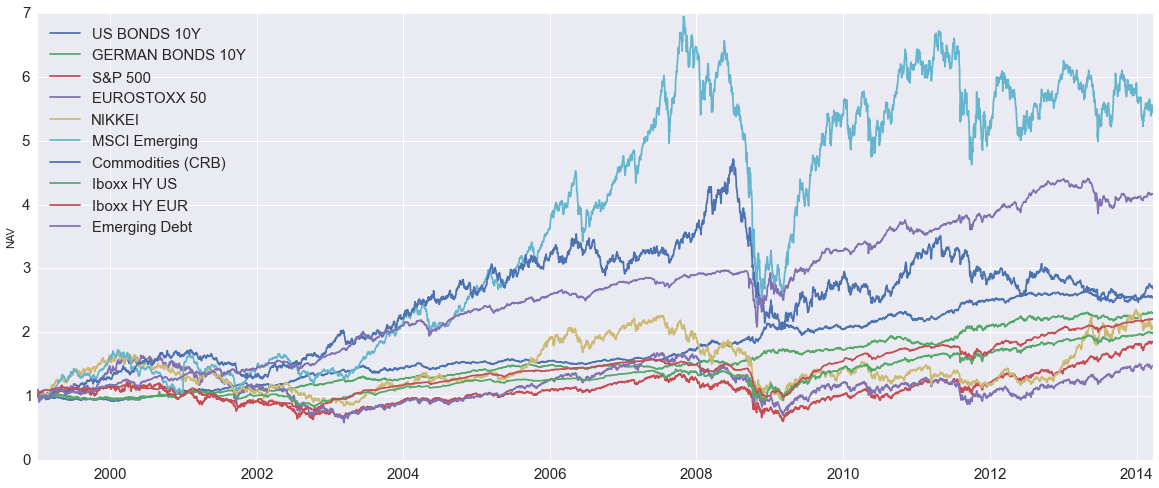

In [81]:
data.plot()
plt.ylabel('NAV')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15,loc='upper left')

Pour construire le portefeuille on va calculer les rendements de chancun des actifs:

$$r_t^i = \frac{P_t^i}{P_{t-1}^i}-1$$

En python on fait simplement:

In [82]:
R = data / data.shift()-1
R = R.fillna(0)

In [83]:
R.head()

,US BONDS 10Y,GERMAN BONDS 10Y,S&P 500,EUROSTOXX 50,NIKKEI,MSCI Emerging,Commodities (CRB),Iboxx HY US,Iboxx HY EUR,Emerging Debt
1998-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1999-01-01,0.000088,0.000119,0.000088,-0.000003,0.000075,-0.000053,-0.000053,-0.000053,-0.000003,-0.000053
1999-01-04,-0.001343,0.009390,-0.003352,0.060174,-0.020085,0.015699,0.012194,0.000741,-0.000008,0.015733
1999-01-05,-0.002898,-0.000255,0.009956,0.012571,-0.015503,0.009750,-0.006961,0.000347,-0.002896,0.013553
1999-01-06,0.002161,0.001913,0.021634,0.027487,0.010026,0.023002,0.023365,0.002244,0.000516,0.002605


* Finalement les rendements du  portefeuille 1/n sont donnés par: 


$$r_t^p = \sum_i r^i_t x_{1/n}^i$$ 


* Matriciellement on a : 

$$r_t^p = r_t^\top x_{1/n}$$

In [84]:
#calcul du nombre d'actifs
n = R.columns.size

In [85]:
#calcul des poids
x_1n = np.ones(n) / n
print x_1n

[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]


In [86]:
#calcul des rendements du portefeuille
R_1n = np.dot(R,x_1n)
R_1n = np.nan_to_num(R_1n)

In [87]:
#calcul du backtest (NAV) en cumulant
backtest = pd.DataFrame((R_1n+1).cumprod(),index = data.index,columns = {"1/n"})

#ajoute eonia pour comparer
backtest["Eonia"] = eonia_cap

In [88]:
backtest.head()

,1/n,Eonia
1998-12-31,1.000000,1.000263
1999-01-01,1.000015,1.000351
1999-01-04,1.008930,1.000438
1999-01-05,1.010712,1.000526
1999-01-06,1.022330,1.000614


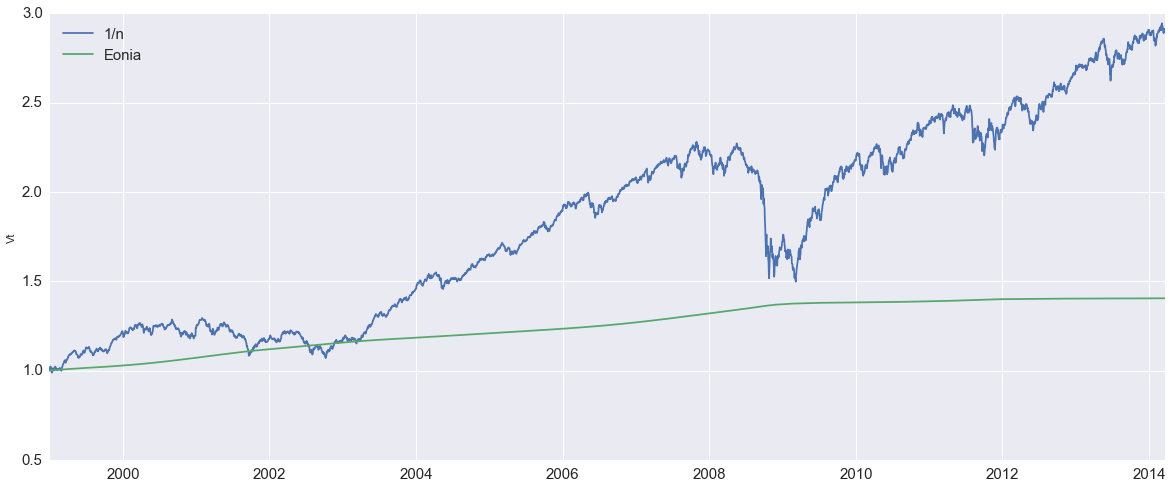

In [91]:
backtest.plot()
plt.ylabel('Vt')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15,loc='upper left')

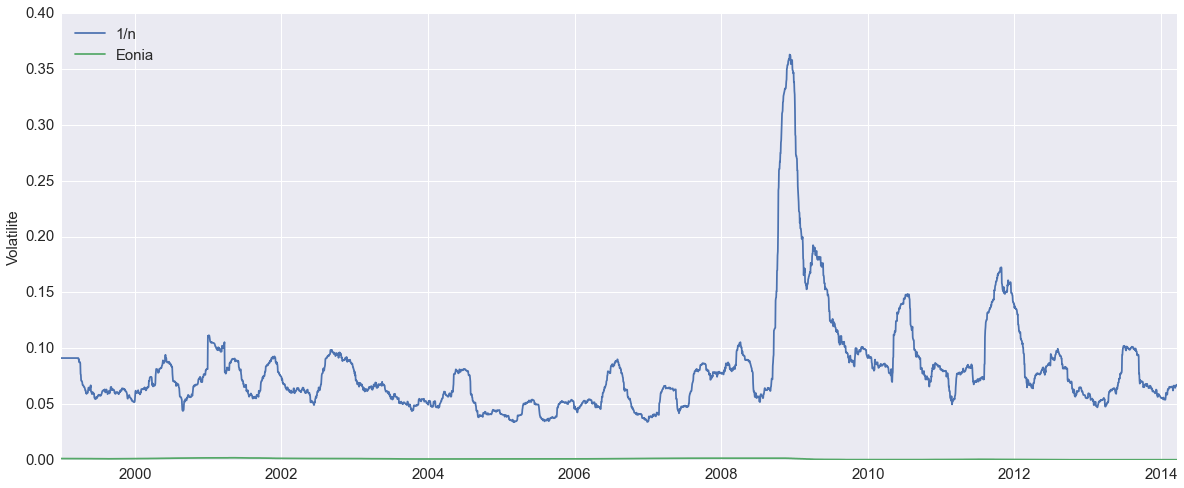

In [101]:
vol = pd.rolling_std((backtest-backtest.shift())/backtest,60)*np.sqrt(260) 
vol = vol.fillna(method="backfill")
vol.plot()
plt.ylabel('Volatilite', fontsize=15)
plt.ylabel 
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15,loc='upper left')                   

# Stratégie de controle de volatilité

**Le calcul de volatilité rolling nous montre :**

* Que la volatiltié bouge beaucoup dans le temps, ce qui veut dire que le risque bouge dans le temps donc que la probabilité de perdre x% est différente d'une année sur l'autre. 

Mais, on peut faire une stratégie de controle de volatilité, **le vol-target**.




* L'idée est la suivante : si les rendements suivent une loi normale disons $r_t\sim \mathcal{N}(\mu,\sigma_t)$, on a vu que un estimateur du risque $\hat{\sigma_t}$ est donné par la volatilité historique. 


* Disons que je veux avoir une volatilité qui soit toujours à peu près à $\sigma^\star = 10\%$. On voit alors que :


$$ r_t\frac{\sigma^\star}{\sigma_t}\sim \mathcal{N}\left(\mu\frac{\sigma^\star}{\sigma_t},\sigma^\star\right) $$ 





 
Il suffit donc d'investir uniquement une proportion $x_{vt} = \frac{\sigma^\star}{\sigma_t}$ dans l'actif pour obtenir une volatilité cible égale à $10\%$. 

 * Si $x_{vt}>1$ on emprunte au taux sans risque pour acheter de l'actif risqué : **leverage**
 * Si $x_{vt}<1$ on vends de l'actif risqué pour placer au taux sans risque  : **deleverage**
 
**Exercice :** Faire un vol target à 5% du portefeuille 1/n et comparer la volatilité rolling

In [102]:
vol_cible = 0.05
x_vt = vol_cible /  vol["1/n"] 

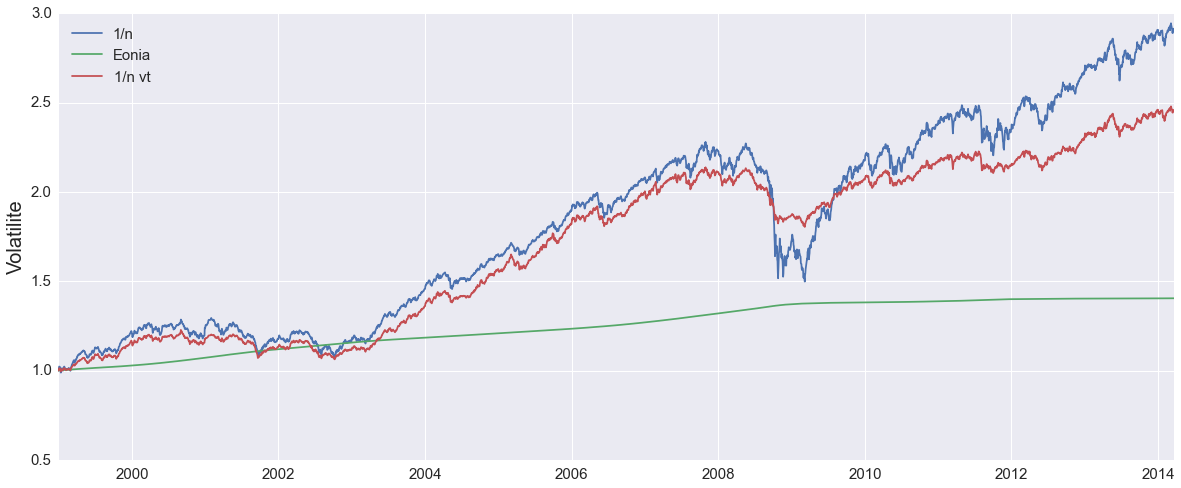

In [105]:
x_vt = np.nan_to_num(x_vt)
backtest["1/n vt"] = (1+x_vt*R_1n + (1-x_vt)*r_eonia).cumprod()

backtest.plot()
plt.ylabel('Volatilite', fontsize=20)
plt.ylabel 
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15,loc='upper left')   

1/n       9.153251
Eonia     0.132471
1/n vt    5.152158
dtype: float64


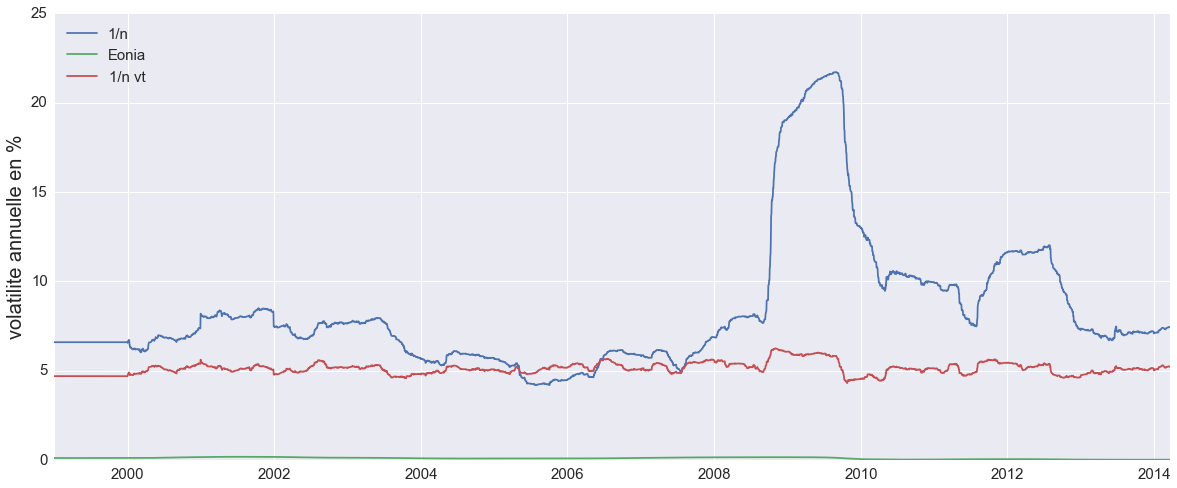

In [108]:
vol = pd.rolling_std((backtest-backtest.shift())/backtest,260)*np.sqrt(260) *100
vol = vol.fillna(method="backfill")
vol.plot()
plt.ylabel('volatilite annuelle en %', fontsize=20)
plt.ylabel 
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15,loc='upper left')   
print ((backtest-backtest.shift())/backtest).std()*np.sqrt(260)*100


# Strategie Smart Beta


## Petit rappel sur la matrice de covariance et de correlation

**Petit rappel sur la matrice de covariance et de correlation**


La matrice de corrélation $C$ nous donne les différentes corrélations entre les actifs. On peut construire la matrice de variance covariance $\Sigma$ à partir de cette matrice :

$$ C =\left(\begin{array}{ccccc}
1\\
\rho_{1,2} & 1\\
\rho_{1,3} & \rho_{2,3} & 1\\
\rho_{1,4} &  \rho_{2,4} & \rho_{3,4} & 1\\
\rho_{1,5} & \rho_{2,5} & \rho_{3,5} &  &1
\end{array}\right) \qquad \Rightarrow \qquad \Sigma =\left(\begin{array}{ccccc}
\sigma_{1}^{2}\\
\sigma_{1}\sigma_{2}\rho_{1,2} & \sigma_{2}^{2}\\
\sigma_{1}\sigma_{3}\rho_{1,3} & \sigma_{2}\sigma_{3}\rho_{2,3} & \sigma_{3}^{2}\\
\sigma_{1}\sigma_{4}\rho_{1,4} & \sigma_{2}\sigma_{4}\rho_{2,4} & \sigma_{3}\sigma_{4}\rho_{3,4} & \sigma_{4}^{2}\\
\sigma_{1}\sigma_{5}\rho_{1,5} & \sigma_{2}\sigma_{5}\rho_{2,5} & \sigma_{3}\sigma_{5}\rho_{3,5} & \sigma_{4}\sigma_{5} & \sigma_{5}^{2}
\end{array}\right)$$
 


Mathématiquement on a :

$$ \Sigma = C \cdot \sigma\sigma^\top $$

On peut donc facilement passer de l'une à l'autre à l'aide des variances

In [109]:
cor = R.corr()*100

#ou

cov = R.cov()
cor  = cov / np.outer(np.diag(cov)**0.5,np.diag(cov)**0.5)
cor*100

,US BONDS 10Y,GERMAN BONDS 10Y,S&P 500,EUROSTOXX 50,NIKKEI,MSCI Emerging,Commodities (CRB),Iboxx HY US,Iboxx HY EUR,Emerging Debt
US BONDS 10Y,100.000000,59.672878,-29.150412,-31.114240,-25.850700,-21.803577,-13.821400,-12.677637,-5.687535,8.111517
GERMAN BONDS 10Y,59.672878,100.000000,-24.254747,-39.981025,-25.084766,-26.565689,-13.150994,-16.433785,-6.962379,5.362690
S&P 500,-29.150412,-24.254747,100.000000,59.150864,58.832491,49.638085,22.319055,44.647797,6.188341,22.586457
EUROSTOXX 50,-31.114240,-39.981025,59.150864,100.000000,43.271547,52.188580,24.477082,34.310356,18.621411,26.342904
NIKKEI,-25.850700,-25.084766,58.832491,43.271547,100.000000,53.395117,22.711343,40.851524,10.753733,16.756347
MSCI Emerging,-21.803577,-26.565689,49.638085,52.188580,53.395117,100.000000,33.583992,42.686143,21.393690,35.071013
Commodities (CRB),-13.821400,-13.150994,22.319055,24.477082,22.711343,33.583992,100.000000,26.197610,12.504589,14.016086
Iboxx HY US,-12.677637,-16.433785,44.647797,34.310356,40.851524,42.686143,26.197610,100.000000,21.015720,25.389091
Iboxx HY EUR,-5.687535,-6.962379,6.188341,18.621411,10.753733,21.393690,12.504589,21.015720,100.000000,20.554182
Emerging Debt,8.111517,5.362690,22.586457,26.342904,16.756347,35.071013,14.016086,25.389091,20.554182,100.000000


On peut utiliser une visualisation pour mieux comprendre la structure de correlation de nos données. Par exemple :

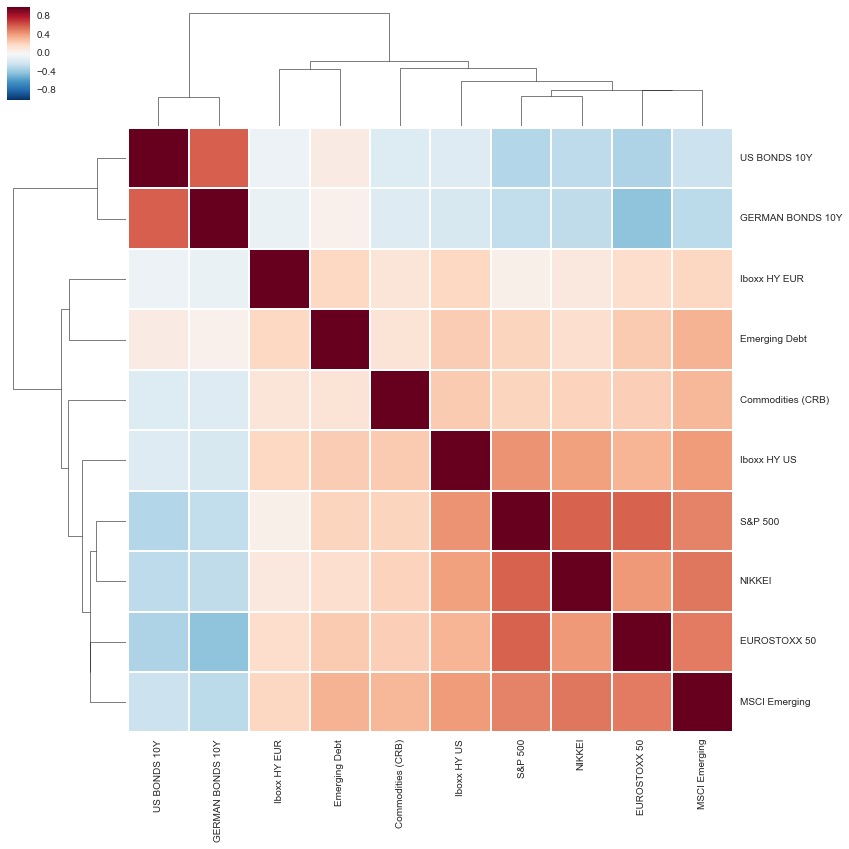

In [110]:
sns.clustermap(cor ,figsize=(13, 13), linewidths=.5 ,square=True)

**Exercice ** construire cette matrice pour l'univers multi-asset.


* On peut alors calculer la volatilité d'un portefeuille $x$:

$$\sigma(x)=\sqrt{x^\top\Sigma x}$$

* Avec deux actifs : $Var(x_1 r_1 + x_2 r_2) = x_1^2 Var(r_1) + x_2^2 Var(r_2) + 2x_1 x_2 Var(r_1)^{1/2}Var(r_2)^{1/2}\rho $

Par exemple on peut  calculer la volatilité du portefeuille 1/n : 

In [111]:
vol_1n = np.sqrt(x_1n.dot(cov).dot(x_1n))*np.sqrt(260)
print vol_1n

0.0913671073197


* On voudra toujours avoir $\Sigma$ **définie positive**. Pourquoi ?

 * De meme le rendement espéré du portefeuille $x$ est simplement :


$$\mu(x) = \mu^\top x$$

  * On peut prendre également les rendements historiques pour estimer le vecteur $\mu$ qui sera en fait la moyenne des rendements :

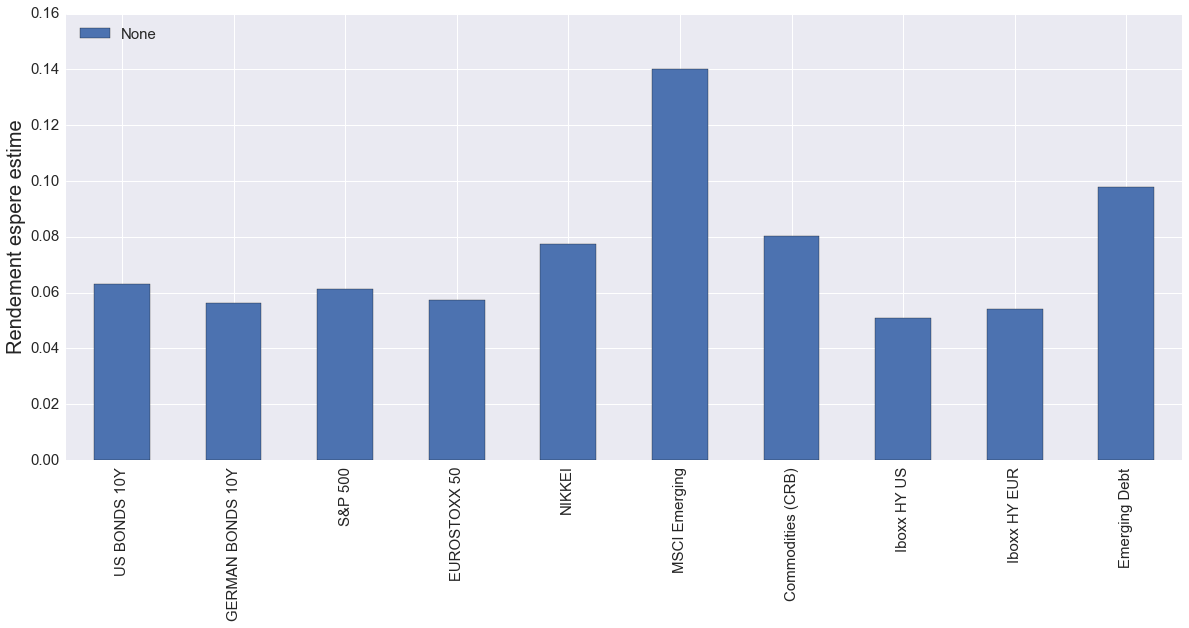

In [118]:
mu = R.mean(axis = 0) * 260
mu.plot.bar()
plt.ylabel('Rendement espere estime', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15,loc='upper left')   

In [119]:
mu_1n = mu.dot(x_1n)
mu_1n

0.073885859310042781

La plupart des méthodes d'optimisation de portefeuille sont basées sur ces deux quantités. 

Finalement **si tout est gaussien, les rendements du portefeuille $x$ sont aussi gaussiens** et on a :

$$r_x \sim \mathcal{N}(\mu(x),\sigma^2(x))$$

## Les portefeuilles minimum variance et moyenne variance

**Le portefeuille minimum variance** est simplement le portefeuille qui minimise la variance des rendements du portefeuille.

\begin{eqnarray}
x^{\star } &=&\arg \min \frac{1}{2}x^{\top }\Sigma x \\
&\text{u.c.}&\left\{
\begin{array}{l}
x\in \mathcal{C} \\
\mathbf{1}^{\top }x=1 \\
x\geq \mathbf{0}%
\end{array}%
\right. \notag
\end{eqnarray}


Si on enlève les contraintes $x\geq \mathbf{0}$ et $x\in \mathcal{C}$ on peut avoir une formule fermée. Le langangien du probleme est:


$$l(x,\lambda) =  \frac{1}{2}x^{\top }\Sigma x - \lambda(\mathbf{1}^{\top }x-1)$$




on dérive et on obtient:


$$x^\star = \lambda\Sigma^{-1}\mathbf{1} $$ 


On voit apparaitre l'inverse de matrice de variance covariance appelée aussi matrice d'information $\mathcal{I}$. C'est "l'équivalent" de la division pour les matrices. 


Si son calcul est assez compliqué on peut lui donner une interpretation fiancière à l'aide de la regression linéaire.

Pour cela on va considérer la régression linéaire suivante :

\begin{equation}
R_{i,t} = \beta_0 + \beta _{i}^{\top }R_{t}^{\left( -i\right) }+\varepsilon
_{i,t}
\end{equation}

ou $R_{t}^{\left( -i\right) }$ est le vector des rendements   $R_{t}$
excluant le $i^{\mathrm{th}}$ actif et  $\varepsilon _{i,t}\sim \mathcal{N}%
(0,s_{i}^{2})$

Stevens (1998) montre alors que les éléments diagonaux de la matrice d'information sont donnés par :

\begin{equation*}
\mathcal{I}_{i,i}=\frac{1}{\hat{s_{i}}^{2} }
\end{equation*}

tandis que les éléments en dehors de la diagonal sont donnés par :

\begin{equation*}
\mathcal{I}_{i,j}=-\frac{\hat{\beta}_{i,j}}{\hat{s_{i}}^{2}
}=-\frac{\hat{\beta}_{j,i}}{\hat{s_{j}}^{2}}
\end{equation*}

On obtient :

$$
\Sigma^{-1} =\left(\begin{array}{ccccc}
\frac{1}{\hat{s_{1}}^{2} }\\
-\frac{\hat{\beta}_{2,1}}{\hat{s_{2}}^{2}} &\frac{1}{\hat{s_{2}}^{2} }\\
-\frac{\hat{\beta}_{3,1}}{\hat{s_{3}}^{2}} &-\frac{\hat{\beta}_{3,2}}{\hat{s_{3}}^{2} }& \frac{1}{\hat{s_{3}}^{2} }\\
-\frac{\hat{\beta}_{4,1}}{\hat{s_{4}}^{2}} &-\frac{\hat{\beta}_{4,3}}{\hat{s_{4}}^{2}} & -\frac{\hat{\beta}_{4,3}}{\hat{s_{4}}^{2}}& \frac{1}{\hat{s_{4}}^{2} }\\
-\frac{\hat{\beta}_{5,1}}{\hat{s_{5}}^{2}} &-\frac{\hat{\beta}_{5,2}}{\hat{s_{5}}^{2}} &-\frac{\hat{\beta}_{5,3}}{\hat{s_{5}}^{2}} & -\frac{\hat{\beta}_{5,4}}{\hat{s_{5}}^{2}} & \frac{1}{\hat{s_{5}}^{2} }
\end{array}\right)
$$

En utilisant cette expression de $\mathcal{I}$, on obtient une nouvelle formulation de la solution du problème de minimum variance
\begin{equation*}
x_{i}^{\star } =\lambda \left( \frac{1}{\hat{s_{i}}^{2}}-\frac{\sum_{j\neq i}\hat{\beta}_i}{ 
\hat{s_{i}}^{2}  } \right)
\end{equation*}

  *  Un poids est élevé en valeur absolue si l'actif se hedge bien en risque
  *  Un poids est négatif si le hedge de l'actif est supérieur à 100% 

**Exercice** Calculer l'inverse de la matrice de covariance. En déduire quel sera le poids du MV le plus élevé en valeur absolue. Calculer les poids du MV avec  $\lambda = 1$ 

In [120]:
inv_cov = np.linalg.inv(cov)

lbda = 1#  1/inv_cov.sum().sum()
inv_cov = np.linalg.inv(cov) 
x_mv = lbda * inv_cov.dot(np.ones(n))
print x_mv * 100

[ 4107023.87477249  8002458.91913808   419174.26302893   651090.99715196
   313132.45179843  -314620.10333883   572297.58263084  1268234.44803508
  5235876.41266072   686496.91069567]


La somme des poids est bien loin de 1.

In [121]:
x_mv.sum()

209411.6575657338

Pour obtenir la somme des poids égale à 1, on ne peut agir que sur le paramètre lambda. C'est ce que fait l'optimiseur normalement. Ici on peut augmenter le paramètre "à la main" jusqu'a trouver 1 ou il y a une formule fermée:


$$\lambda = \frac{1}{\mathbf{1}^\top\Sigma^{-1}\mathbf{1}} $$


**Exercices :** Calculer la volatilité du portefeuille MV et comparer avec celle du 1/n. Comparer également l'esperance de rendement. Quel portefeuille préférez vous ? Comment choisir ?

In [122]:
inv_cov = np.linalg.inv(cov)

lbda =   1/inv_cov.sum().sum()
inv_cov = np.linalg.inv(cov)
x_mv = lbda * inv_cov.dot(np.ones(n))
x_mv * 100

vol_mv = np.sqrt(x_mv.dot(cov).dot(x_mv))*np.sqrt(260)
vol_mv

0.035235971235757516

In [123]:
mu_mv = x_mv.dot(mu)
mu_mv

0.057919971083560437


 
Pour résoudre ce probleme avec plusieurs contraintes on va utiliser **l'optimisation convexe** plus précisément **la programmation quadratique** qui est très utilisée en finance quantitative.  



*  Généralement on a un solver "qprog" qui fait le travail:

\begin{equation*}
 \begin{aligned}
 & \underset{x}{\text{minimize}}
 & & J(x) = \frac{1}{2} \mathbf{x}^T Q \mathbf{x} + c^T \mathbf{x} \\
 & \text{sous contrainte de :} 
 & & A\mathbf{x} \leq \mathbf b \mbox{  (contraintes d'inégalité)} \\
 & 
 & &     E\mathbf{x} = \mathbf d  \mbox{  (contraintes d'égalité)}
 \end{aligned}
\end{equation*}

*On trouve un solver qprog dans tous les langages et ils sont toujours sous ce format. On voit que si on a $Q=\Sigma$, $c=0$, $E=[1,...1]$, $d=1$ on a exactement le probleme du minimum variance.*






Dans le cas minimum variance, on a juste optmisé sur le risque. On peut prendre en compte les estimateurs de tendances esperées des actifs pour ajouter une dimension "directionnelle":



**Le portefeuille moyenne variance** 

\begin{eqnarray*}
x^{\star } &=&\arg \min \frac{1}{2}x^{\top }\Sigma x -\color{blue}{\phi \mu^\top x} \\
&\text{u.c.}&\left\{
\begin{array}{l}
x\in \mathcal{C} \\
\mathbf{1}^{\top }x=1 \\
x\geq \mathbf{0}
\end{array}
\right.  
\end{eqnarray*}

* Le paramètre $\phi$ est l'aversion au risque. 
    *  ce paramètre sert à controler le risque, un peu comme le vol-target.

De la on obtient la frontière efficiente :

<img src=http://riskencyclopedia.com/wp-content/uploads/2013/06/exhibit_capital_market_line_1.png  height="600" width="800">

**Exercice : ** Calculer la frontiere efficiente sur l'unviers multi-asset.


Si on fait abstraction des contraintes de poids positifs et de budget, le langangien du problème est :


$$l(x,\phi) =  \frac{1}{2}x^{\top }\Sigma x - \phi\mu^{\top }x$$


on dérive et on obtient :


$$x^\star = \phi\Sigma^{-1}\mu $$ 



Disons que $\phi = 0.5$, on peut calculer la solution :

In [124]:
phi = 0.0005
x_mvo = phi * inv_cov.dot(mu)
print x_mvo

[ 1.42293409  1.94817466  0.08560929  0.06330895  0.0927576   0.14608198
  0.21706109  0.06281772  1.21777893  0.80803427]


Regardons notre risque:

In [125]:
vol_mvo = np.sqrt(x_mvo.dot(cov).dot(x_mvo))*np.sqrt(260)
vol_mvo

0.22840146945573048

et le rendement espéré :

In [126]:
mu_mvo = x_mvo.dot(mu)
mu_mvo

0.40128639422720747

Ce portefeuille est il meilleur que le minimum variance et le 1/n  ?


## La budgétisation du risque 

La variance (ou le risque) d'un portefeuille peut etre décomposée selon la contribution de chancun des actifs au risque ($\mathrm{RC}_i $).


Le terme $\mathrm{RC}_i = x_i \frac{\partial\, \sigma\left(w\right)}{\partial\, w_i}$ est appellé la contribution du
$i^{\text{ème}}$ actif au risque du portefeuille. Elle   est égale au produit du poids et du risque marginal.

matriciellement cette déomposition s'écrit :


$$ x^\top \Sigma x = \sum_i x_i (\Sigma x)_i$$

Bien évidemment on a:


$$x^\top \Sigma x = \sum_i \mathrm{RC}_i$$

In [127]:
var_1n = x_1n.dot(cov).dot(x_1n) * 260
var_1n_dec = np.sum(x_1n* cov.dot(x_1n)) * 260

print var_1n**0.5, var_1n_dec**0.5

0.0913671073197 0.0913671073197


La stratégie de gestion ERC (equal risk contribution) consiste à trouver le portefeuille qui égalise la contribution au risque de tous les actifs soit :


$$\mathrm{RC}_i = \mathrm{RC}_j$$

 Mathématiquement la solution du portefeuille ERC et l'optimum du programme suivant :

\begin{eqnarray*}
x^{\star } &=&\arg \min \frac{1}{2}x^{\top }\Sigma x \color{blue}{-\lambda \sum_i \ln x }\\
&\text{u.c.}&\left\{
\begin{array}{l}
\mathbf{1}^{\top }x=1 \\
x\geq \mathbf{0}
\end{array}
\right.  
\end{eqnarray*}

La contrainte de log force les poids à étre positifs.
 


 On voit que si on dérive par rapport à $x_i$ à l'optimal on a exactement :

$$  x_i (\Sigma x)_i = \lambda
 $$
 
 Ce qui veut dire que toutes les contribution au risque sont égales.

 ** Exercice :** Calculer les contribution en risque du 1/n et du minimum variance. Calculer la solution ERC sur l'univers multi asset. Comparer.

Le problème peut etre facilement résolu par un algorithme de descente par coordonée (CCD)
Le Lagrangien du problème est donné par :

\begin{equation*}
\mathcal{L}\left( x;\lambda \right) =\arg \min x^{\top }\Sigma x%
-\lambda \sum_{i=1}^{n}b_{i}\ln x_{i}
\end{equation*}

Sans perte de généralité on peut fixxer $\lambda =1$. La condition de premier ordre donne :

\begin{equation*}
\frac{\partial \,\mathcal{L}\left( x;\lambda \right) }{\partial \,x_{i}}=%
 {\left( \Sigma x\right) _{i}} -\frac{b_{i}}{%
x_{i}}
\end{equation*}

A l'optimal on doit avoir $\partial _{x_{i}}\,\mathcal{L}\left( x;\lambda
\right) =0$ ou encore :

\begin{equation*}
x_{i}\cdot \left( \Sigma x\right) _{i}-b_{i}\sigma \left( x\right) =0
\end{equation*}

En réarrangeant on obtient :
\begin{equation*}
x_{i}^{2}\sigma _{i}^{2}+x_{i}\sigma _{i}\sum_{j\neq i}x_{j}\rho
_{i,j}\sigma _{j}-b_{i}\sigma \left( x\right) =0
\end{equation*}

On doit donc résoudre un polynome du second degrés dont la solution positive est :

\begin{equation}
x_{i}^{\star }=\frac{\sigma _{i}\sum_{j\neq i}x_{j}\rho _{i,j}\sigma _{j}+%
\sqrt{\sigma _{i}^{2}\left( \sum_{j\neq i}x_{j}\rho _{i,j}\sigma _{j}\right)
^{2}+4\sigma _{i}^{2}b_{i}\sigma \left( x\right) }}{2\sigma _{i}^{2}}
\end{equation}

En cyclant on optient la solution

In [128]:
 
def computeERC(Sigma):
    Sigma = np.array(Sigma)
    n = np.shape(Sigma)[0]
    
    x0 = np.ones((n,1)) / n
    x = x0*10
    var = np.diag(Sigma)
    Sx = Sigma.dot(x)
    cvg = False
    
    while not cvg:
        for i in range(n):
            alpha = var[i];
            beta =  (Sx[i]-x[i]*var[i])[0];
            
            gamma_ = -1.0/n;
             
            x_tilde = (-beta + np.sqrt(beta**2 - 4*alpha*gamma_)) / (2*alpha);
            x_i = x[i];

            x[i] = x_tilde;
            Sx = Sigma.dot(x) 
            
        cvg = np.sum( (x/np.sum(x) - x0/np.sum(x0))**2 ) <= 1e-5;
        print cvg
        x0 = x.copy()
        
    return x/x.sum()

False
False
False
True


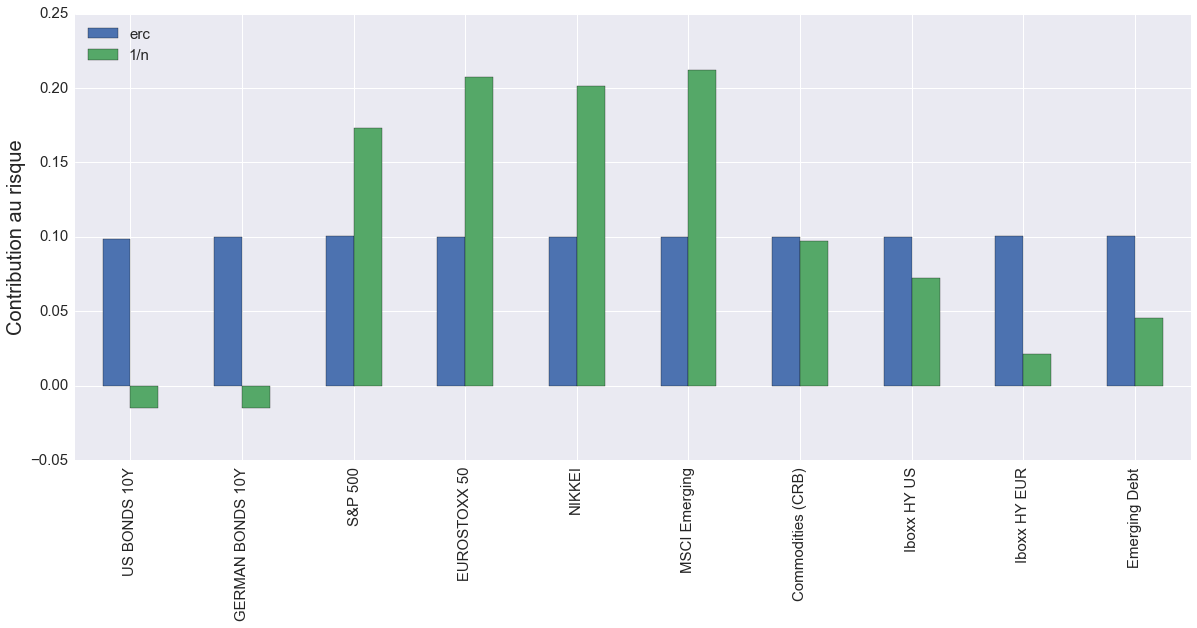

In [132]:
#calcul de l'ERC (portefeuille Equal Risk Contribution)
x_erc = computeERC(cov)

#calcul des contribution au risque
rc = x_erc*(cov.dot(x_erc))

#on met en base 100 dans une dataframe
rc = pd.DataFrame(rc/rc.sum())
rc.columns = ['erc']

#idem pour le portefeuille 1/n
rc_1n = x_1n*(cov.dot(x_1n))
rc["1/n"] = pd.DataFrame(rc_1n/rc_1n.sum())
 
#plot 
rc.plot.bar()
plt.ylabel('Contribution au risque', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15,loc='upper left')   

 # Backtest des stratégies

 * On a vu des allocations de portefeuille statiques 
 
     * elles n'evoluent pas dans le temps, on utilise 10 ans de données de marché pour prendre une exposition aujourd'hui
     
     


 * En pratique on utilise plutot 1 ans de donnée et on recalcule le portefeuille tous les jours ou semaines ou mois

In [133]:
# récupère les dates et nombre de date
dates = R.index.values
nDates = dates.size


# préparation des matrices de poids nbDates x nbAssets
X_mv = pd.DataFrame(index=data.index, columns=data.columns)
X_1n = pd.DataFrame(index=data.index, columns=data.columns)
X_mvo = pd.DataFrame(index=data.index, columns=data.columns)

# préparation du backtest MV et 1n
backtest = pd.DataFrame(index=data.index, columns=["MV","1n"]) 

# initialisation à 1 (100%)
backtest["MV"].iloc[0] = 1
backtest["1n"].iloc[0] = 1

#le lag est la taille de la fenetre de calcul
lag = 260

# on parcours les dates
for t, d in enumerate(dates):
    
    # si on a pas de données on reste à 1
    if t<lag+1:
        backtest["MV"].loc[d] = 1
        backtest["1n"].loc[d] = 1
        continue
    
    #recupère les rendement des actifs sur les 260 derniers jours
    R_t = R.iloc[t-lag:t,:]
    
    #calcul de la matrice de covariance
    cov_t = R_t.cov() * 260
    
    #calcul de l'inverse
    inv_cov = np.linalg.inv(cov_t)
    
    #calcul du lambda optimal pour avoir somme des poids = 1
    lbda = 1/inv_cov.sum().sum()
    
    #calcul de l'allocation
    X_mv.loc[d] =  lbda * inv_cov.dot(np.ones(n))
    
    #calcul de la performance
    r_mv = np.nan_to_num(R.iloc[t,:].dot(X_mv.iloc[t-1]))
    
    #cumul de la valeur du portefeuille
    backtest["MV"].loc[d] =  backtest["MV"].iloc[t-1]*(1+r_mv)
    
    X_1n.loc[d] = np.ones((1,n)) / n
    backtest["1n"].loc[d] =  backtest["1n"].iloc[t-1]*(1+np.nan_to_num(R.iloc[t,:].dot(X_1n.iloc[t-1])))



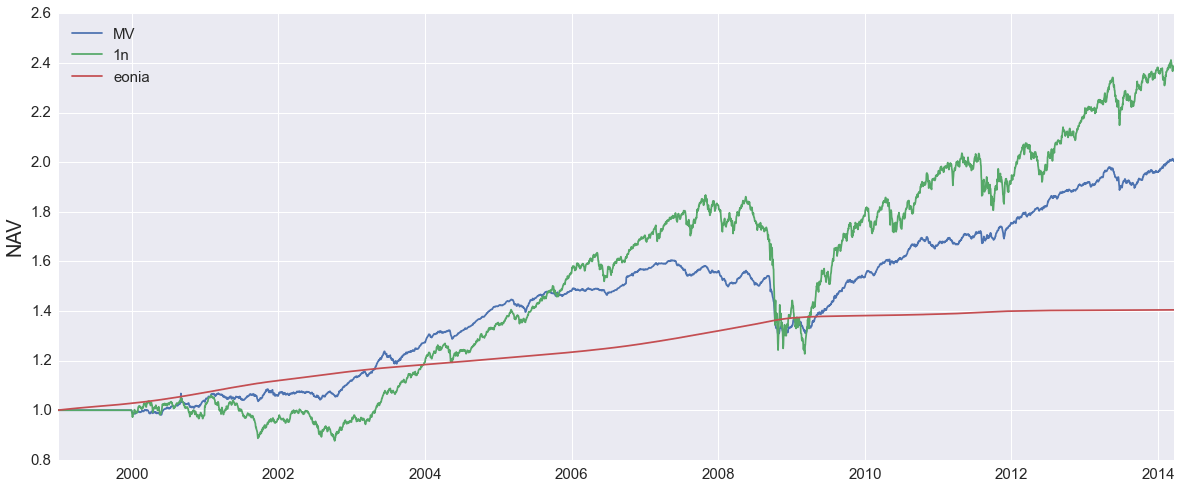

In [135]:

backtest["eonia"] = eonia_cap
backtest.plot()
plt.ylabel('NAV', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15,loc='upper left')   

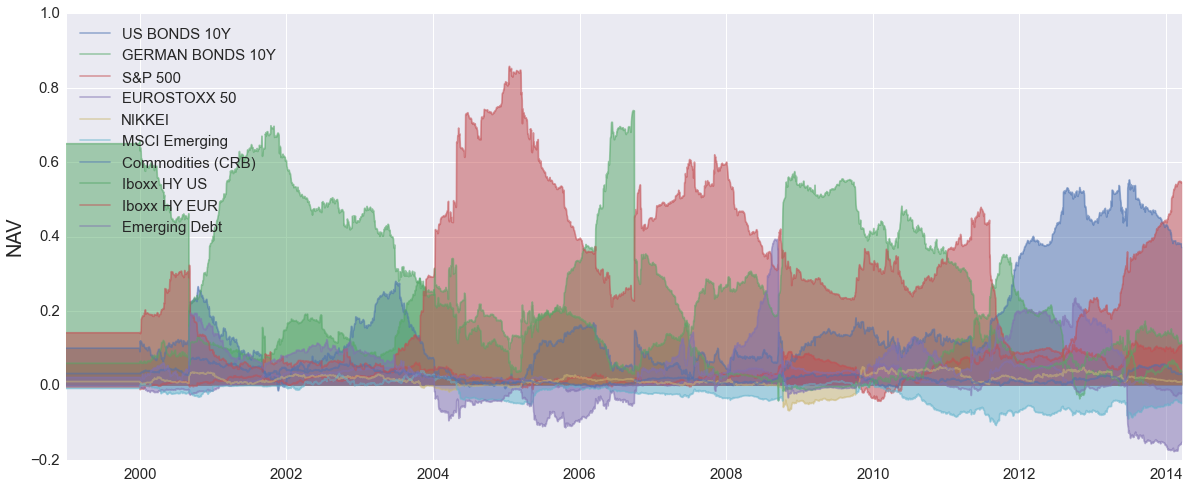

In [137]:
 
X_mv = X_mv.fillna(method="backfill")
X_mv.plot.area(stacked=False)
plt.ylabel('NAV', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15,loc='upper left')   

# Utilisation de l'ACP

* On utilise beaucoup l'ACP en gestion quant car c'est un outils très puissant et simple. 


* Il peut etre facilement interpreté par des portefeuilles. 




Pour cela on va utiliser la decompostion de la matrice de varcovar.
La matrice de variance covariance peut être estimée par 

$$\hat{\Sigma} = R_t^\top R_t / T $$

ou $T = t -t_0$ est la durée en année et $R_t$ la matrice des rendements de taille 260 (jours) en ligne et 10 (actifs) en colonne. On obtient alors en python :  



In [138]:
#on calcule la covariance
p = R.index.size
cov = R.T.dot(R) / p * 260

On diagonalise ensuite la matrice:

$$ \hat{\Sigma}=V\Lambda V^\top{}$$


ou les valeurs propres sont dans la matrice diagonale $\Lambda = \mathrm{diag}\left(\lambda_{1},\cdots,\lambda_{n}\right)$ avec $\lambda_1>\lambda_2>\cdots >\lambda_n$ et la matrice des vecteurs propres $V$ est telle que $V^\top V=I$.

On peut aussi écrire la décomposition comme :

$$ \hat{\Sigma}= \sum_i \lambda_i v_i v_i^\top{} $$


  * Les valeurs propre : c'est information. Dans notre application financière **c'est la variance**.
 
 
  * Les vecteurs propres : donne le vecteur (et donc la direction) sur lequel est representée l'information. Danc notre application financière **c'est un portefeuille**.

Pour trouver la plus grande variance (ou valeur propre) on va donc maximiser la variance d'un vecteur :
    
\begin{eqnarray*}
\lambda_1 &=&\ \max  v_1^{\top }\Sigma v_1  \\
&\text{u.c.}& {v_1}^{\top }v_1=1  
\end{eqnarray*}
    
Ensuite on enleve toute cette information de la matrice de covariance et on recommance.

$$
\Sigma:= \Sigma-\lambda_1v_1{v_1}^{\top }
$$

  * il y a autant de facteur que de nombre d'actif quand la matrice de covariance est bien définie positive.
  
  * Les portefeuille sont mutuellement corrélés à 0.

**Exercice : ** Faire la decomposition de la matrice de variance covariance

In [139]:
#on utilise singular value decomposition / décomposition valeur propre vecteurs propres
V, L, Vt = np.linalg.svd(cov,full_matrices=True)
V = pd.DataFrame(data = V,index=cov.columns.values) 
V.columns = ["Vec. Prore "+str(x) for x in range(1,11)]
L = pd.DataFrame(data = L,index=V.columns.values,columns={"Valeur Propre"}) 

In [140]:
print V  

                   Vec. Prore 1  Vec. Prore 2  Vec. Prore 3  Vec. Prore 4  \
US BONDS 10Y          -0.055547      0.021938     -0.029987      0.035911   
GERMAN BONDS 10Y      -0.053156      0.045608     -0.016329      0.008270   
S&P 500                0.416679     -0.008984      0.329542     -0.196672   
EUROSTOXX 50           0.516660     -0.729425      0.217470     -0.047225   
NIKKEI                 0.493370      0.671399      0.323878     -0.132673   
MSCI Emerging          0.497703      0.097972     -0.563097      0.615048   
Commodities (CRB)      0.181210      0.003013     -0.638198     -0.742399   
Iboxx HY US            0.148154      0.052229     -0.045890     -0.038188   
Iboxx HY EUR           0.034982     -0.024474     -0.056477      0.026699   
Emerging Debt          0.079987     -0.039824     -0.091520      0.092295   

                   Vec. Prore 5  Vec. Prore 6  Vec. Prore 7  Vec. Prore 8  \
US BONDS 10Y          -0.021667      0.199477     -0.241701      0.676689  

On rappelle également que l'inverse de la matrice de variance covariance admet la meme décomposition avec des valeurs propres inverses et les mêmes vecteurs propres :


$$ \hat{\Sigma}^{-1}=V\Lambda^{-1} V^\top{}$$

**Exercice : ** Calculer les valeurs propres de l'inverse

Les rendements des facteurs sont simplement donnés par $$\mathcal{F}_t =   R_t V \Lambda^{-1/2} p^{-1/2}  $$


On voit bien alors que la matrice de variance covariance des facteurs est l'identité:


 \begin{eqnarray}
\mathcal{F}_t^\top \mathcal{F}_t &=& p^{-1}  \Lambda^{-1/2} V^{\top} R_t^\top  R_t V \Lambda^{-1/2} \\ 
  &=&    \Lambda^{-1/2} V^{\top} V\Lambda V^\top{} V \Lambda^{-1/2} \\
&=&    \Lambda^{-1/2}  \Lambda   \Lambda^{-1/2} \\
&=& I
\end{eqnarray}


On peut vérifier:

In [141]:
F = pd.DataFrame(R.dot(V).dot(np.diag(L["Valeur Propre"].pow(-0.5)))/(p**(0.5)),index=data.index)
print(F.T.dot(F))

              0             1             2             3             4  \
0  3.846154e-03  5.603970e-18 -6.064756e-19 -4.065758e-20 -1.931235e-18   
1  5.603970e-18  3.846154e-03  4.912791e-19  1.090873e-18  4.607859e-19   
2 -6.064756e-19  4.912791e-19  3.846154e-03  5.759824e-20 -2.280213e-18   
3 -4.065758e-20  1.090873e-18  5.759824e-20  3.846154e-03 -2.015938e-18   
4 -1.931235e-18  4.607859e-19 -2.280213e-18 -2.015938e-18  3.846154e-03   
5  2.122665e-18 -6.115578e-19 -2.007468e-18 -6.640738e-19 -4.582448e-19   
6 -7.708000e-19  5.082198e-21  5.389247e-19  7.487771e-19  1.781310e-18   
7  1.329630e-18 -1.761829e-18 -3.564315e-18  2.082007e-18 -3.704922e-18   
8 -4.367302e-18  1.694066e-21  7.597886e-19 -1.047780e-18  2.402993e-18   
9  2.350252e-19 -8.258571e-19 -6.367994e-18  1.954952e-18 -3.656641e-18   

              5             6             7             8             9  
0  2.122665e-18 -7.708000e-19  1.329630e-18 -4.367302e-18  2.350252e-19  
1 -6.115578e-19  5.082198e

* Les facteurs sont donc simplement des stratégies non corrélées les unes aux autres




* les vecteurs propres sont intéprétés comme des portefeuilles 
  *  On les appelle les portefeuilles propres.




* C'est une façon de voir un univers en stratégie indépendantes.

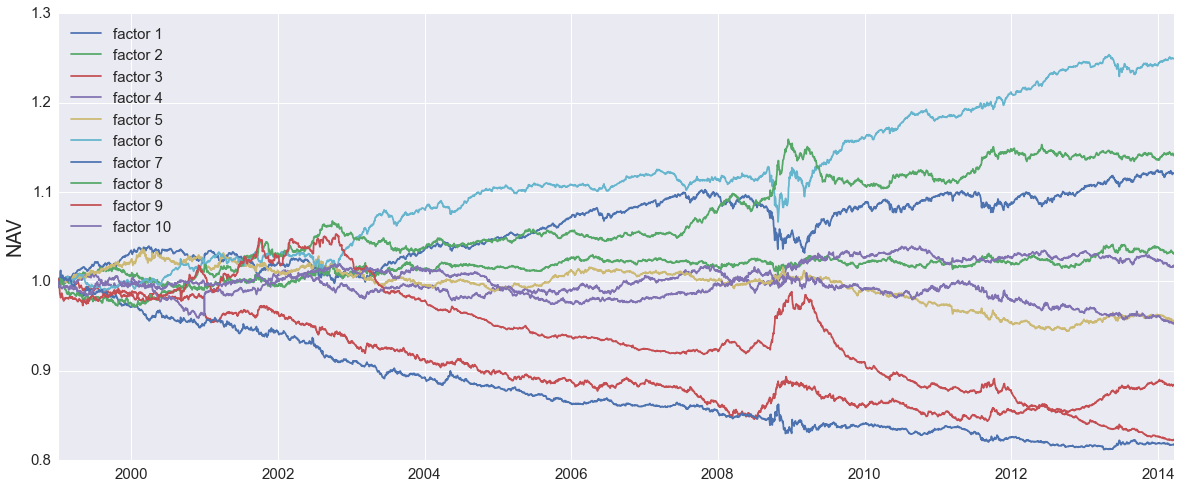

In [144]:
factor = pd.DataFrame(np.array((F+1).cumprod()),columns=['factor '+str(x+1) for x in range(10)],index = F.index)
factor.plot()
plt.ylabel('NAV', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15,loc='upper left')   

Il y a un intérêt dans la gestion de portefeuille. Si on reprend le probleme de markowitz, on peut exprimer les poids à l'aide des facteurs :


\begin{eqnarray}
x^\star &=& \phi\Sigma^{-1}\mu\\ 
  &=&   \phi V\Lambda^{-1} V^\top{}\mu
\end{eqnarray}


Si on investit le portefeuille, les rendements du portefeuille sont donnés par:


\begin{eqnarray}
r_t^p &=& r_t^\top x^\star\\ 
  &=&    r_t^\top  V\Lambda^{-1} V^\top{}\mu \phi \\
  &=&     r_t^\top  V\Lambda^{-1/2}\Lambda^{-1/2} V^\top{}\mu \phi\\
  &=&    (r_t^\top  V\Lambda^{-1/2}/p^{1/2}) (p^{1/2}\Lambda^{-1/2} V^\top{}\mu \phi)
\end{eqnarray}

* On voit alors que le rendement du facteur apparait :
    
    $$ f_t  = r_t^\top  V\Lambda^{-1/2}/p^{1/2} $$ 


    
* Ainsi que les poids $z$ dans les facteurs :

$$ z  =p^{1/2}\Lambda^{-1/2} V^\top{}\mu \phi $$ 

* Et donc finalement les rendemement du portefeuille sont :

$$ r_t^p  =  f_t^\top z  $$


** On voit ici que les rendements du portefeuille peuvent être vus comme les rendements d'un investissement dans les actifs mais aussi dans les facteurs.**


## Utilisation pour simuler des browniens correlés

Quand on fait des simulations de montecarlo à plusieurs actifs on a besoin de corréler les variables aléatoires. On peut alors utiliser l'ACP :

  * Tirer un échantillon de variable aléatoires gaussiennes **indépendante**
  
  Avec excel on utilisera les fonctions norminv et rand.


  * Définir la matrice de covariance
  
  On utilisera la matrice de covariance de l'univers multi asset


  * Passer de l'univers indépendant à dependant grace à l'ACP
  
  Faire l'ACP de la matrice de covariance